In [44]:
# import required libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')

In [45]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [46]:
print(cleaned_dataset)

            Country Age Group    Sex Marital Status Data Process  Start Year  \
0       Afghanistan   [15-19]    Man       Divorced       Survey        1972   
1       Afghanistan   [20-24]    Man       Divorced       Survey        1972   
2       Afghanistan   [25-29]    Man       Divorced       Survey        1972   
3       Afghanistan   [30-34]    Man       Divorced       Survey        1972   
4       Afghanistan   [35-39]    Man       Divorced       Survey        1972   
...             ...       ...    ...            ...          ...         ...   
228211     Zimbabwe   [55-59]  Woman        Widowed       Survey        2017   
228212     Zimbabwe   [60-64]  Woman        Widowed       Survey        2017   
228213     Zimbabwe   [65-69]  Woman        Widowed       Survey        2017   
228214     Zimbabwe   [70-74]  Woman        Widowed       Survey        2017   
228215     Zimbabwe     [75+]  Woman        Widowed       Survey        2017   

        End Year          Data Source  

In [47]:
# Verify and correct column names if needed
cleaned_dataset.columns = cleaned_dataset.columns.str.strip()  # Remove any leading/trailing whitespace

In [48]:
if 'Count' not in cleaned_dataset.columns:
    cleaned_dataset['Count'] = 1

In [49]:
# Assuming 'east_countries_data' is already loaded

# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
marital_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(marital_pivot.columns)

# Show the first few rows to inspect
print(marital_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [53]:
print("Features shape:", features.shape)
print("Marital pivot shape:", marital_pivot.shape)

Features shape: (234, 5)
Marital pivot shape: (234, 6)


In [54]:
# Initialize and fit GMM
gmm = GaussianMixture(n_components=5, random_state=0)  # Adjust n_components as needed
gmm.fit(features)

# Predict clusters
clusters = gmm.predict(features)

In [55]:
features = marital_pivot.drop(columns=['Country'])  # Make sure 'Country' column is excluded

In [56]:
gmm.fit(features)
clusters = gmm.predict(features)

In [57]:
print("Length of clusters:", len(clusters))
print("Number of rows in marital_pivot:", len(marital_pivot))

Length of clusters: 234
Number of rows in marital_pivot: 234


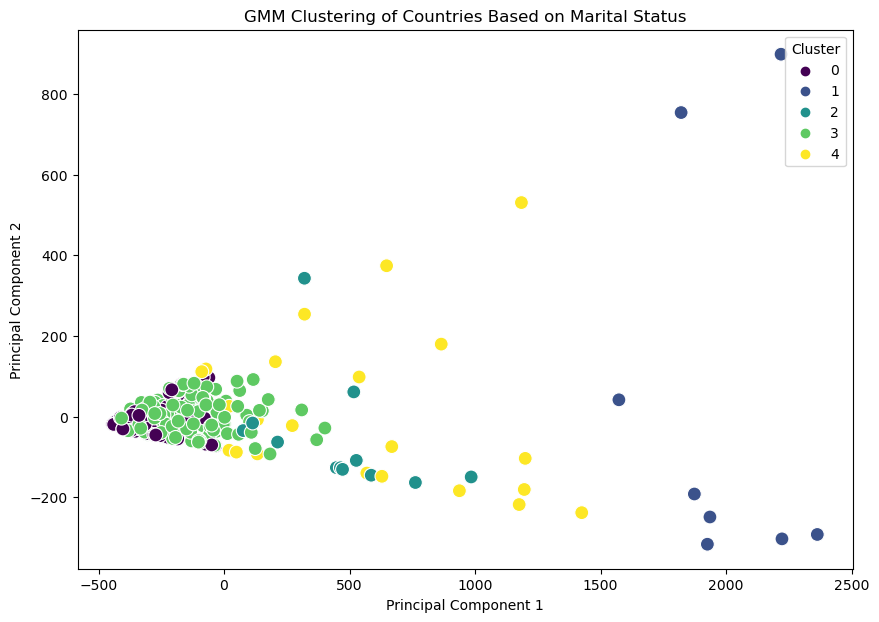

In [58]:
# Add cluster labels to the original DataFrame
marital_pivot['Cluster'] = clusters

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
plot_df['Cluster'] = clusters
plot_df['Country'] = marital_pivot['Country']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=plot_df, palette='viridis', s=100)
plt.title('GMM Clustering of Countries Based on Marital Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from Natural Earth (this approach should work with newer versions)
shapefile_path = r"C:/Users/user/Desktop/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

# Load the shapefile
world = gpd.read_file(shapefile_path)

# Check the columns
print(world.columns)

world

Index(['scalerank', 'featurecla', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST',
       'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY',
       'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN',
       'ABBREV_LEN', 'TINY', 'HOMEPART', 'geometry'],
      dtype='object')


scalerank       featurecla  LABELRANK      SOVEREIGNT SOV_A3  ADM0_DIF  \
0            3  Admin-0 country        5.0     Netherlands    NL1       1.0   
1            0  Admin-0 country        3.0     Afghanistan    AFG       0.0   
2            0  Admin-0 country        3.0          Angola    AGO       0.0   
3            3  Admin-0 country        6.0  United Kingdom    GB1       1.0   
4            0  Admin-0 country        6.0         Albania    ALB       0.0   
..         ...              ...        ...             ...    ...       ...   
250          3  Admin-0 country        4.0           Samoa    WSM       0.0   
251          0  Admin-0 country        3.0           Yemen    YEM       0.0   
252          0  Admin-0 country        2.0    South Africa    ZAF       0.0   
253          0  Admin-0 country        3.0          Zambia    ZMB       0.0   
254          0  Admin-0 country        3.0        Zimbabwe    ZWE       0.0   

     LEVEL               TYPE         ADMIN ADM0_A3  ...      CONTINENT  \
0      2.0            Country         Aruba     ABW  ...  North America   
1      2.0  Sovereign country   Afghanistan     AFG  ...           Asia   
2      2.0  Sovereign country        Angola     AGO  ...         Africa   
3      2.0         Dependency      Anguilla     AIA  ...  North America   
4      2.0  Sovereign country       Albania     ALB  ...         Europe   
..     ...                ...           ...     ...  ...            ...   
250    2.0  Sovereign country         Samoa     WSM  ...        Oceania   
251    2.0  Sovereign country         Yemen     YEM  ...           Asia   
252    2.0  Sovereign country  South Africa     ZAF  ...         Africa   
253    2.0  Sovereign country        Zambia     ZMB  ...         Africa   
254    2.0  Sovereign country      Zimbabwe     ZWE  ...         Africa   

    REGION_UN        SUBREGION                   REGION_WB NAME_LEN LONG_LEN  \
0    Americas        Caribbean   Latin America & Caribbean      5.0      5.0   
1        Asia    Southern Asia                  South Asia     11.0     11.0   
2      Africa    Middle Africa          Sub-Saharan Africa      6.0      6.0   
3    Americas        Caribbean   Latin America & Caribbean      8.0      8.0   
4      Europe  Southern Europe       Europe & Central Asia      7.0      7.0   
..        ...              ...                         ...      ...      ...   
250   Oceania        Polynesia         East Asia & Pacific      5.0      5.0   
251      Asia     Western Asia  Middle East & North Africa      5.0      5.0   
252    Africa  Southern Africa          Sub-Saharan Africa     12.0     12.0   
253    Africa   Eastern Africa          Sub-Saharan Africa      6.0      6.0   
254    Africa   Eastern Africa          Sub-Saharan Africa      8.0      8.0   

     ABBREV_LEN  TINY HOMEPART  \
0           5.0   4.0    -99.0   
1           4.0 -99.0      1.0   
2           4.0 -99.0      1.0   
3           4.0 -99.0    -99.0   
4           4.0 -99.0      1.0   
..          ...   ...      ...   
250         5.0 -99.0      1.0   
251         4.0 -99.0      1.0   
252         5.0 -99.0      1.0   
253         6.0 -99.0      1.0   
254         5.0 -99.0      1.0   

                                              geometry  
0    POLYGON ((-69.99694 12.57758, -69.93639 12.531...  
1    POLYGON ((71.0498 38.40866, 71.05714 38.40903,...  
2    MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...  
3    MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...  
4    POLYGON ((19.74777 42.5789, 19.74601 42.57993,...  
..                                                 ...  
250  MULTIPOLYGON (((-171.57002 -13.93816, -171.564...  
251  MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...  
252  MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...  
253  POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...  
254  POLYGON ((30.01065 -15.64623, 30.05024 -15.640...  

[255 rows x 66 columns]

<Axes: >

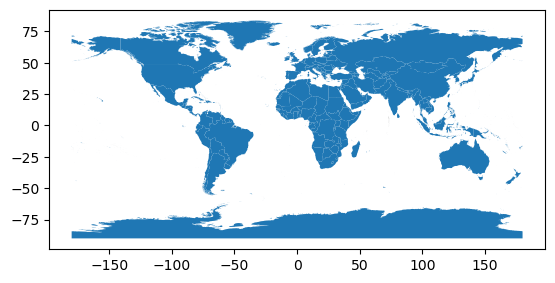

In [60]:
world.plot()

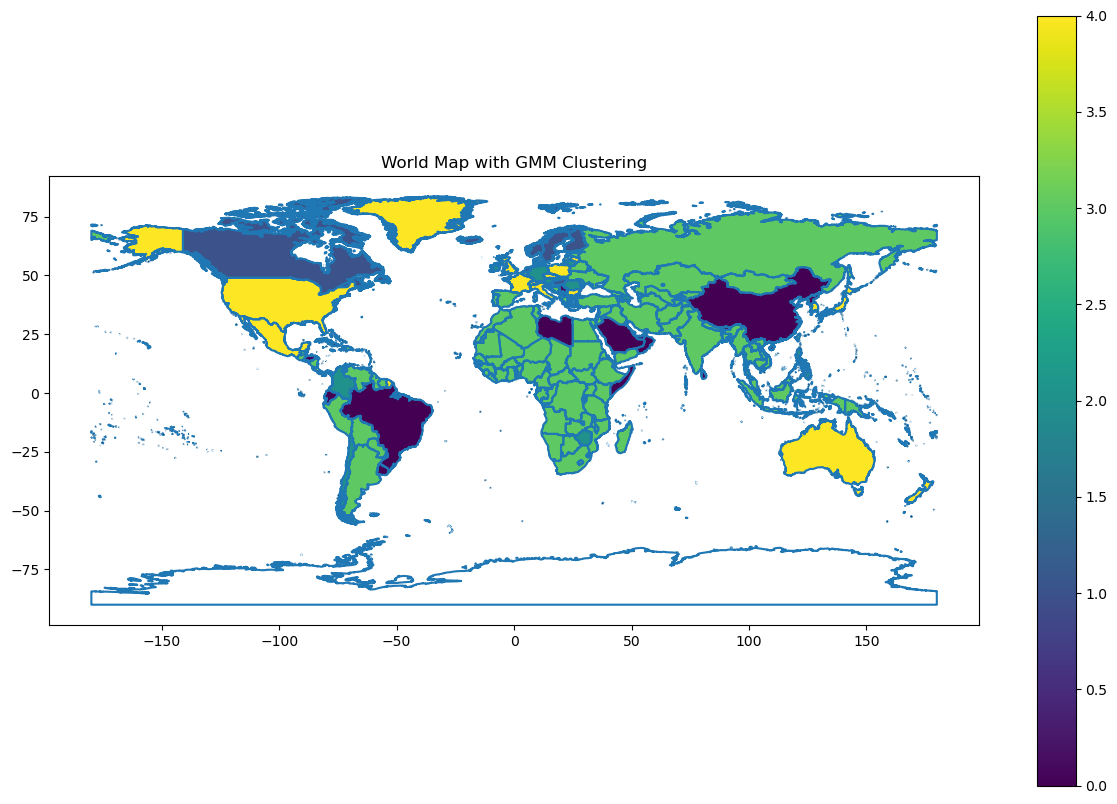

In [61]:
# Merge with clustering results
world_clusters = world.merge(marital_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

In [178]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.04074134517951543


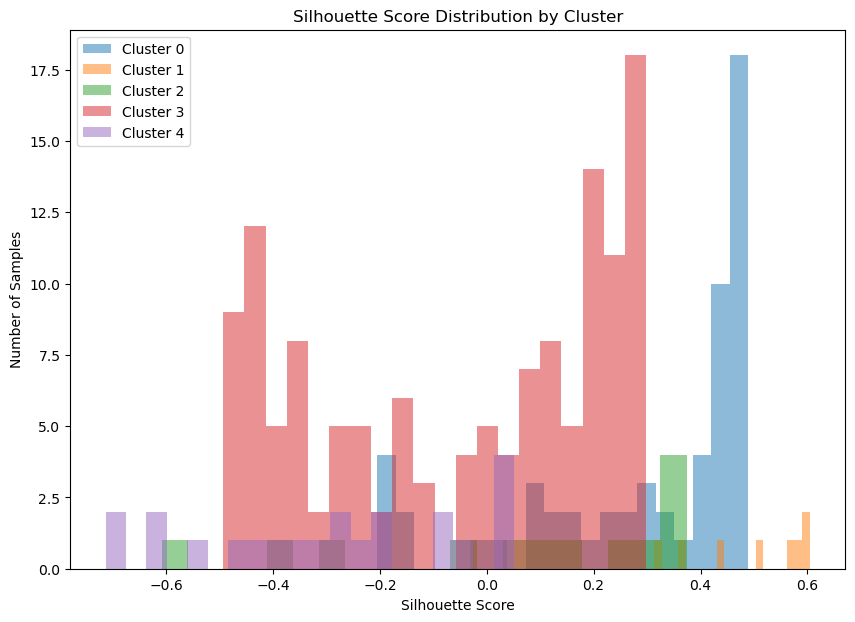

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(features, clusters)

# Plot the silhouette scores
plt.figure(figsize=(10, 7))

# Silhouette plot for each cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    plt.hist(cluster_silhouette_vals, bins=20, alpha=0.5, label=f'Cluster {cluster}')

plt.title('Silhouette Score Distribution by Cluster')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()

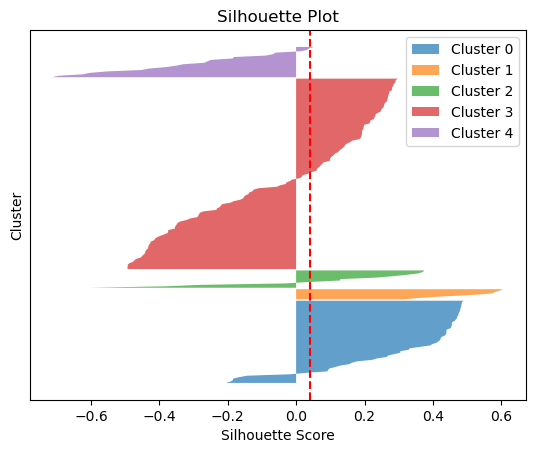

In [180]:
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

def plot_silhouette(X, y_pred):
    # Compute silhouette scores
    silhouette_vals = silhouette_samples(X, y_pred)
    y_lower, y_upper = 0, 0
    for i in np.unique(y_pred):
        # Aggregate the silhouette scores for samples belonging to cluster i
        cluster_silhouette_vals = silhouette_vals[y_pred == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
        y_lower += len(cluster_silhouette_vals)
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster')
    plt.yticks([])
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')
    plt.legend()
    plt.show()

# Use the function to plot
plot_silhouette(features, clusters)

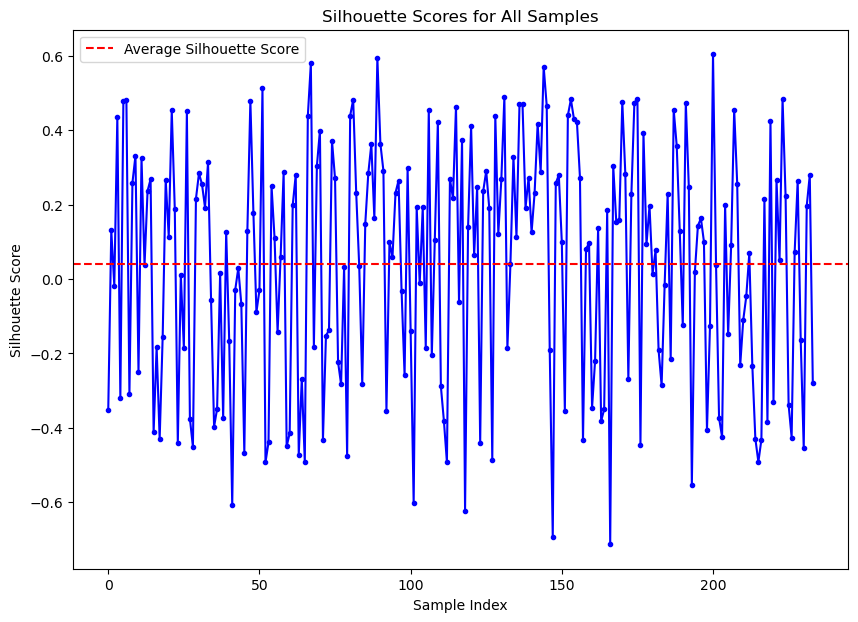

In [194]:
# Create a figure
plt.figure(figsize=(10, 7))

# Plot silhouette scores for all samples
plt.plot(np.arange(len(silhouette_vals)), silhouette_vals, color='blue', marker='o', linestyle='-', markersize=3)

plt.title('Silhouette Scores for All Samples')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.legend()
plt.show()

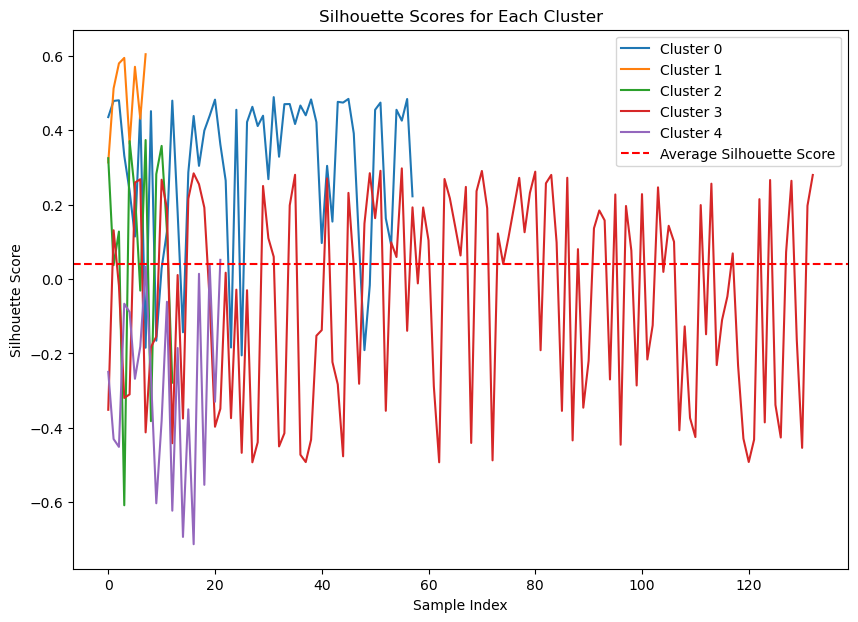

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(features, clusters)

# Create a figure
plt.figure(figsize=(10, 7))

# For each cluster, plot the silhouette scores
for cluster in np.unique(clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    plt.plot(np.arange(len(cluster_silhouette_vals)), cluster_silhouette_vals, label=f'Cluster {cluster}')

plt.title('Silhouette Scores for Each Cluster')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.legend()
plt.show()


# App 1

In [66]:
# Assuming 'east_countries_data' is already loaded

# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
marital_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(marital_pivot.columns)

# Show the first few rows to inspect
print(marital_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [67]:
# Count the total number of people for each country
marital_pivot['Total_People'] = marital_pivot.drop(columns='Country').sum(axis=1)

# Show the updated pivot table with total counts
print(marital_pivot.head())


Marital Status         Country  Divorced  Married  Separated  Single  Widowed  \
0                  Afghanistan       100      116         14      71      116   
1                      Albania       141      185         61      91      191   
2                      Algeria       129      162         57     129      160   
3               American Samoa        84       86         58      90       86   
4                       Angola       101       95         87      48      121   

Marital Status  Total_People  
0                        417  
1                        669  
2                        637  
3                        404  
4                        452  


In [72]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Prepare data for GMM by including the total number of people
Y = marital_pivot.drop(columns='Country')

# Standardize the features
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [75]:
# Apply GMM
gmm2 = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components as needed
clusters2 = gmm2.fit_predict(Y_scaled)

# Add cluster labels to the pivoted data
marital_pivot['Cluster'] = clusters2


Cluster labels distribution:
2    177
0     36
1     21
Name: Cluster, dtype: int64


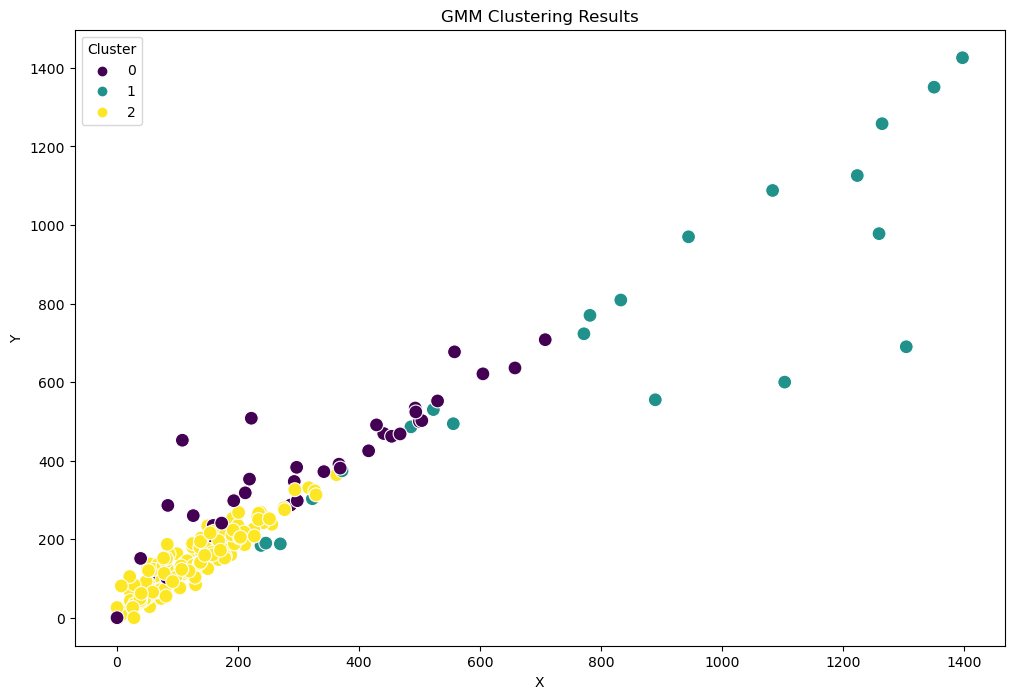

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster distribution
print("Cluster labels distribution:")
print(marital_pivot['Cluster'].value_counts())

# Visualize the results (for two selected age groups)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=marital_pivot.iloc[:, 1], y=marital_pivot.iloc[:, 2], hue=marital_pivot['Cluster'], palette='viridis', s=100)
plt.title('GMM Clustering Results')
plt.xlabel('X')  # Adjust based on your age groups
plt.ylabel('Y')  # Adjust based on your age groups
plt.legend(title='Cluster')
plt.show()


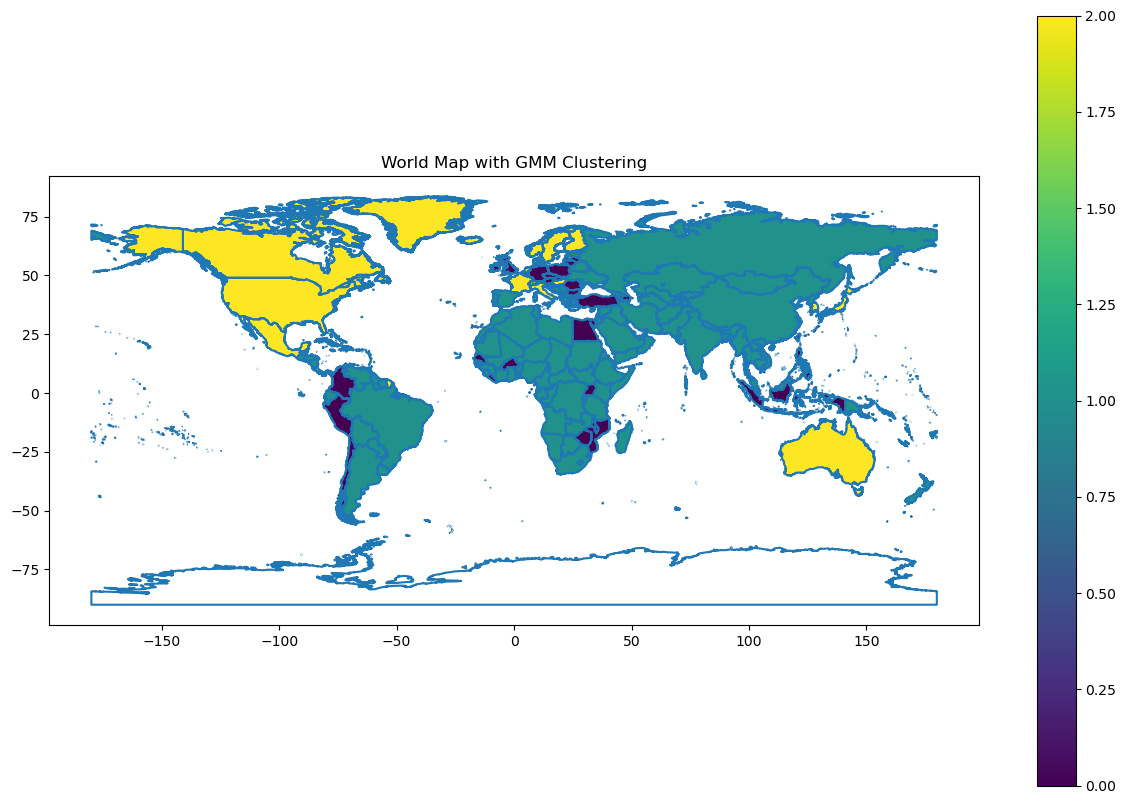

In [71]:
# Merge with clustering results
world_clusters2 = world.merge(marital_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters2.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()